In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [9]:
start = '2024-01-01'
end = '2025-07-01'
stock = '^NSEI'

data = yf.download(stock, start, end)

/tmp/ipython-input-2105786930.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [10]:
data.reset_index(inplace=True)

In [11]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
0,2024-01-01,21741.900391,21834.349609,21680.849609,21727.750000,154000
1,2024-01-02,21665.800781,21755.599609,21555.650391,21751.349609,263700
2,2024-01-03,21517.349609,21677.000000,21500.349609,21661.099609,311900
3,2024-01-04,21658.599609,21685.650391,21564.550781,21605.800781,339200
4,2024-01-05,21710.800781,21749.599609,21629.199219,21705.750000,309300
...,...,...,...,...,...,...
364,2025-06-24,25044.349609,25317.699219,24999.699219,25179.900391,450200
365,2025-06-25,25244.750000,25266.800781,25125.050781,25150.349609,260600
366,2025-06-26,25549.000000,25565.300781,25259.900391,25268.949219,428900


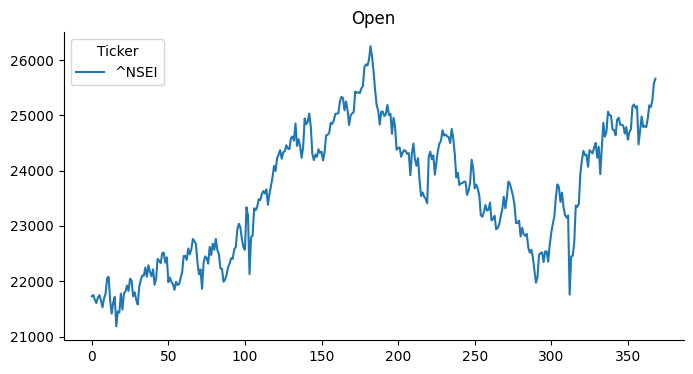

In [12]:
from matplotlib import pyplot as plt
data['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

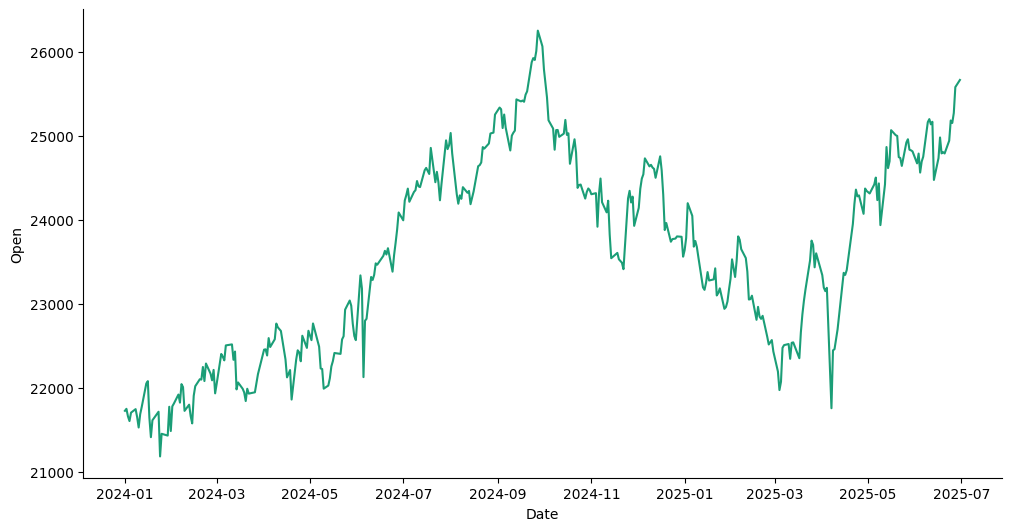

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

In [14]:
ma_100_days = data.Close.rolling(100).mean()

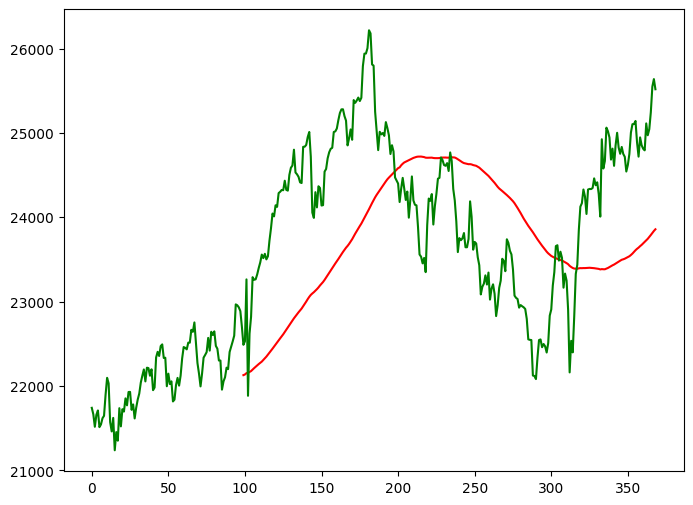

In [15]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [16]:
ma_200_days = data.Close.rolling(200).mean()

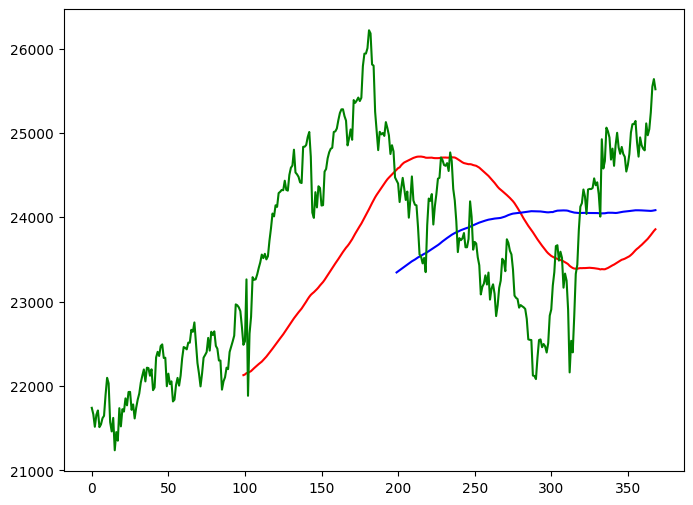

In [17]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [18]:
data.dropna(inplace=True)

In [19]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [20]:
data_train.shape[0]

295

In [21]:
data_test.shape[0]

74

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_train_scale = scaler.fit_transform(data_train)

In [24]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [25]:
x, y = np.array(x), np.array(y)

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - loss: 0.3448
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - loss: 0.1439
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - loss: 0.0501
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - loss: 0.0402
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - loss: 0.0425
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - loss: 0.0364
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - loss: 0.0334
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - loss: 0.0287
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - loss: 0.0320
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - loss: 0.0367
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - loss: 0.0314
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 346ms/step - loss: 0.0287
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - loss: 0.0337
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - loss: 0.0323
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - loss: 0.0281
Epoch 16/50
7/7 ━━

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [31]:
pas_100_days = data_train.tail(100)

In [32]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [33]:
data_test_scale  =  scaler.fit_transform(data_test)

In [34]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [35]:
y_predict = model.predict(x)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step


In [36]:
scale =1/scaler.scale_

In [37]:
y_predict = y_predict*scale

In [38]:
y = y*scale

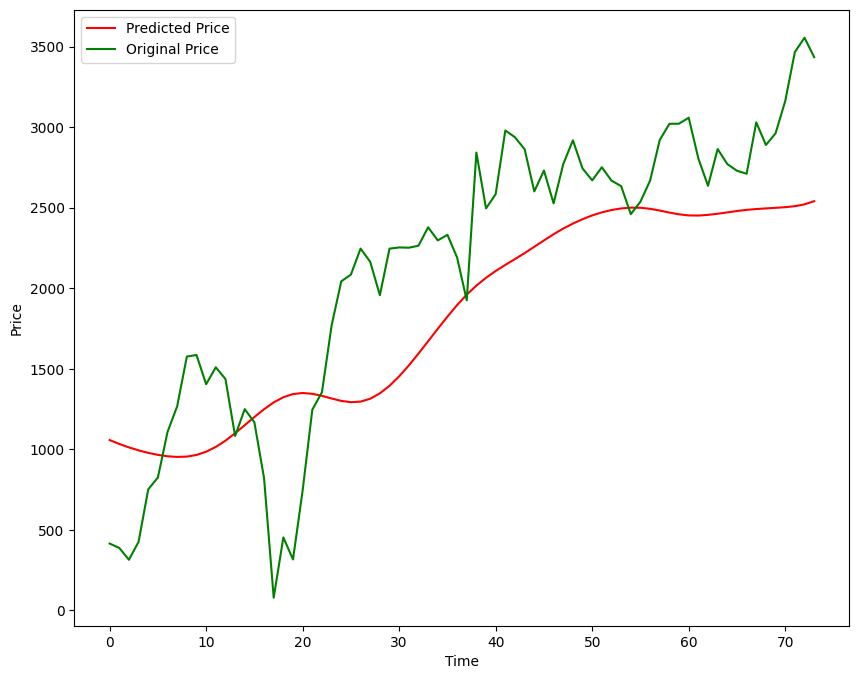

In [39]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
model.save('Stock Predictions Model.keras')

In [ ]:
!pip install backtesting yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.4/191.4 kB 3.7 MB/s eta 0:00:00


In [41]:
import yfinance as yf

data = yf.download('^NSEI', start='2025-01-01', end='2025-07-01')

/tmp/ipython-input-819203860.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^NSEI', start='2025-01-01', end='2025-07-01')
[*********************100%***********************]  1 of 1 completed


In [42]:
!pip install backtesting


In [43]:
import pandas as pd
import yfinance as yf
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA  # using the SMA helper

# 1) Download NSE Index (^NSEI)
data = yf.download('^NSEI',
                   start='2025-01-01',
                   end='2025-07-01',
                   group_by='column',
                   progress=False)

# 2) Flatten columns if MultiIndex slipped in
if isinstance(data.columns, pd.MultiIndex):
    for lvl in range(data.columns.nlevels):
        if data.columns.get_level_values(lvl).nunique() == 1:
            data.columns = data.columns.droplevel(lvl)
            break
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = ['_'.join(map(str, col)).strip() for col in data.columns]

# 3) Conform to Backtesting.py schema
if 'Adj Close' in data.columns and 'Close' in data.columns:
    data['Close'] = data['Adj Close']
if 'Adj Close' in data.columns:
    data = data.drop(columns=['Adj Close'])

need = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in ['Open', 'High', 'Low', 'Close']:
    if col not in data.columns:
        raise ValueError(f"Missing required column: {col}")
if 'Volume' not in data.columns:
    data['Volume'] = 0  # fake if not available

data = data[need].dropna()

# 4) Define strategy (SMA crossover)
class SmaCross(Strategy):
    n1 = 10
    n2 = 20
    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)
    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()

# 5) Run backtest
bt = Backtest(data, SmaCross, cash=10_000, commission=.002, exclusive_orders=True)

# Store stats in 'output'
output = bt.run()

# Print performance metrics
print(output)

# Plot equity curve & trades
bt.plot()



/tmp/ipython-input-93470786.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^NSEI',
/tmp/ipython-input-93470786.py:53: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported by this class. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (see e.g. class `backtesting.lib.FractionalBacktest`.
  bt = Backtest(data, SmaCross, cash=10_000, commission=.002, exclusive_orders=True)


Backtest.run:   0%|          | 0/103 [00:00<?, ?bar/s]

/usr/local/lib/python3.12/dist-packages/backtesting/backtesting.py:966: UserWarning: time=26: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/backtesting/backtesting.py:966: UserWarning: time=36: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/backtesting/backtesting.py:966: UserWarning: time=56: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/backtesting/backtesting.py:966: UserWarning: time=70: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/backtesting/backtesting.py:966: UserWarning: time=77: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/backtesting/backtesting.py:966: UserWarning: time=107: Broke

Start                     2025-01-01 00:00:00
End                       2025-06-30 00:00:00
Duration                    180 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]                11.15029
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
CAGR [%]                                  0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Alpha [%]                                 0.0
Beta                                      0.0
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                      

GridPlot(id='p1575', ...)

In [44]:
output

,0
Start,2025-01-01 00:00:00
End,2025-06-30 00:00:00
Duration,180 days 00:00:00
Exposure Time [%],0.0
Equity Final [$],10000.0
Equity Peak [$],10000.0
Return [%],0.0
Buy & Hold Return [%],11.150294
Return (Ann.) [%],0.0
Volatility (Ann.) [%],0.0
